<a href="https://colab.research.google.com/github/chintamaneni11905158/ml/blob/main/Projecct1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv('NFLX.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


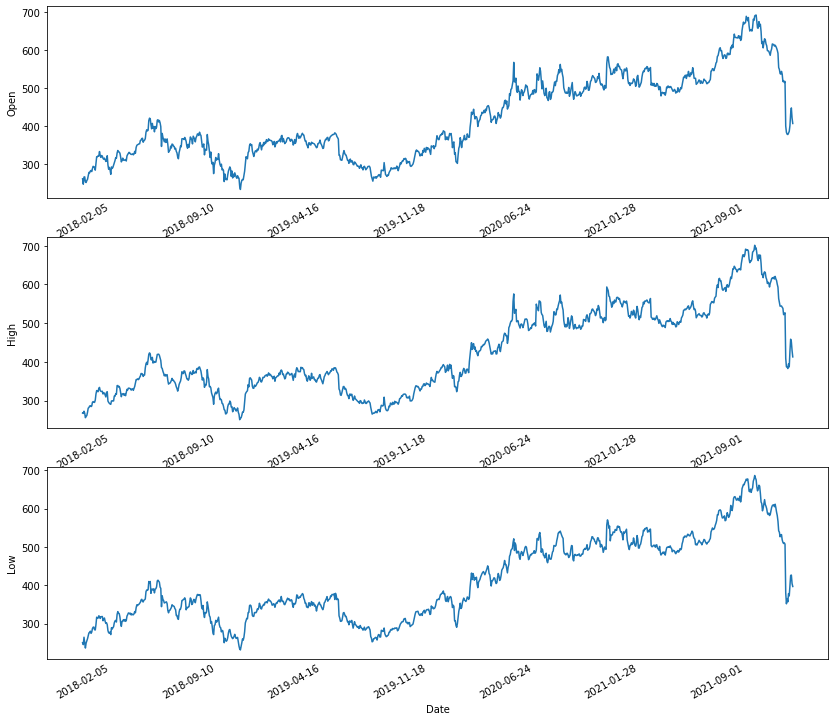

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=False, figsize=(14, 12))
for i,ax in enumerate(fig.axes):
    sns.lineplot(data['Date'],data.iloc[:,i+1] , ax=ax)
    ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))

In [5]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


In [6]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
X = data.drop(columns=["Date" ,'Close', 'Adj Close', 'Volume'] , axis=1).values
y = data.drop(columns=["Date",'Open', 'High', 'Low','Adj Close'] , axis=1).values

In [8]:
scx = StandardScaler()
scy = StandardScaler()
X = scx.fit_transform(X)
y = scy.fit_transform(y)

In [9]:
X_train_full , X_test , y_train_full , y_test  = train_test_split(X,y,test_size=.1,random_state=42)
X_train , X_validate , y_train , y_validate = train_test_split(X_train_full,y_train_full,test_size=.2,random_state=42)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(500,input_dim=3,activation="relu"),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(60,activation="relu"),
    keras.layers.Dense(2)
])
model.compile(loss="mae" , optimizer="nadam",metrics=["accuracy"])
early_stop=EarlyStopping(monitor='loss',mode='min',patience=50,restore_best_weights=True)

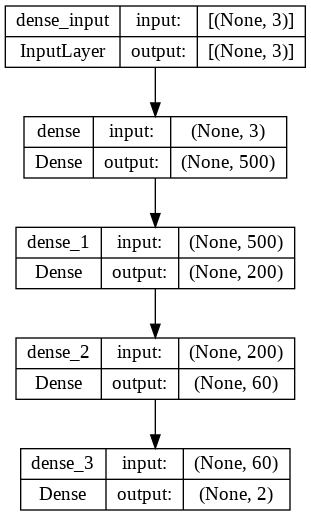

In [11]:
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
training_hist = model.fit(X_train,y_train,epochs=2000 ,validation_data=(X_validate,y_validate) , callbacks=[early_stop])

Epoch 1/2000
23/23 [==============================] - 2s 16ms/step - loss: 0.3916 - accuracy: 0.9284 - val_loss: 0.2738 - val_accuracy: 0.9341
Epoch 2/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.3253 - accuracy: 0.9270 - val_loss: 0.2439 - val_accuracy: 0.9341
Epoch 3/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.3184 - accuracy: 0.9270 - val_loss: 0.2301 - val_accuracy: 0.9341
Epoch 4/2000
23/23 [==============================] - 0s 8ms/step - loss: 0.3130 - accuracy: 0.9242 - val_loss: 0.2263 - val_accuracy: 0.9396
Epoch 5/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.3132 - accuracy: 0.9256 - val_loss: 0.2177 - val_accuracy: 0.9396
Epoch 6/2000
23/23 [==============================] - 0s 7ms/step - loss: 0.3058 - accuracy: 0.9270 - val_loss: 0.2381 - val_accuracy: 0.9286
Epoch 7/2000
23/23 [==============================] - 0s 10ms/step - loss: 0.2969 - accuracy: 0.9311 - val_loss: 0.2277 - val_accuracy: 0.9286
Epoc

In [14]:
model.save('model.h5')

In [15]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2406 - accuracy: 0.9109


[0.24058747291564941, 0.9108911156654358]

In [22]:
closes=[]
volumes=[]
max_open=0
max_high=0
max_low = 0
max_price= 0
max_close=0
max_vol=0
for i,j,k in X:
        new = [[i,j,k]]
        temp=model.predict(new)
        close_=temp[0][0]
        volume_ = temp[0][1]
        closes.append(close_)
        volumes.append(volume_)
        price = close_*volume_
        if price>max_price:
            max_price = price
            max_vol = volume_
            max_close = close_
            max_open = i
            max_high = j
            max_low = k

1/1 [==============================] - 0s 33ms/step


Text(0, 0.5, 'Volume')

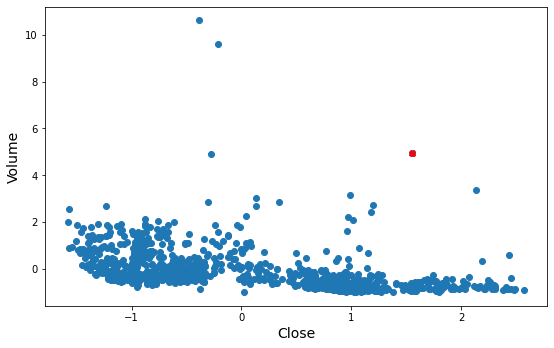

In [23]:
fig2 = plt.figure(figsize=(9,5.5))
plt.scatter(closes,volumes )
plt.plot(max_close,max_vol,"rX" )
plt.xlabel("Close",fontsize=14)
plt.ylabel("Volume",fontsize=14)

In [24]:
invy_trans = scy.inverse_transform([[max_close,max_vol]])
max_close = invy_trans[0][0]
max_vol = invy_trans[0][1]
invx_trans = scx.inverse_transform([[max_open,max_high,max_low]])
max_open = invx_trans[0][0]
max_high = invx_trans[0][1]
max_low = invx_trans[0][2]

In [25]:
print("max close : ",max_close)
print("max volume : ",max_vol)

max close :  587.0903597155093
max volume :  34672752.68683605


In [26]:
print("The optimum point that maximizes the price by maximizing the close and volume values is ({0},{1},{2})".format(max_open,max_high,max_low))

The optimum point that maximizes the price by maximizing the close and volume values is (565.419983,593.289978,556.859985)
